# Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import ast
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies = pd.read_csv('drive/MyDrive/ML/movies_metadata.csv',low_memory=False)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Data Cleaning and EDA

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies[movies['budget'].isnull()]



,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


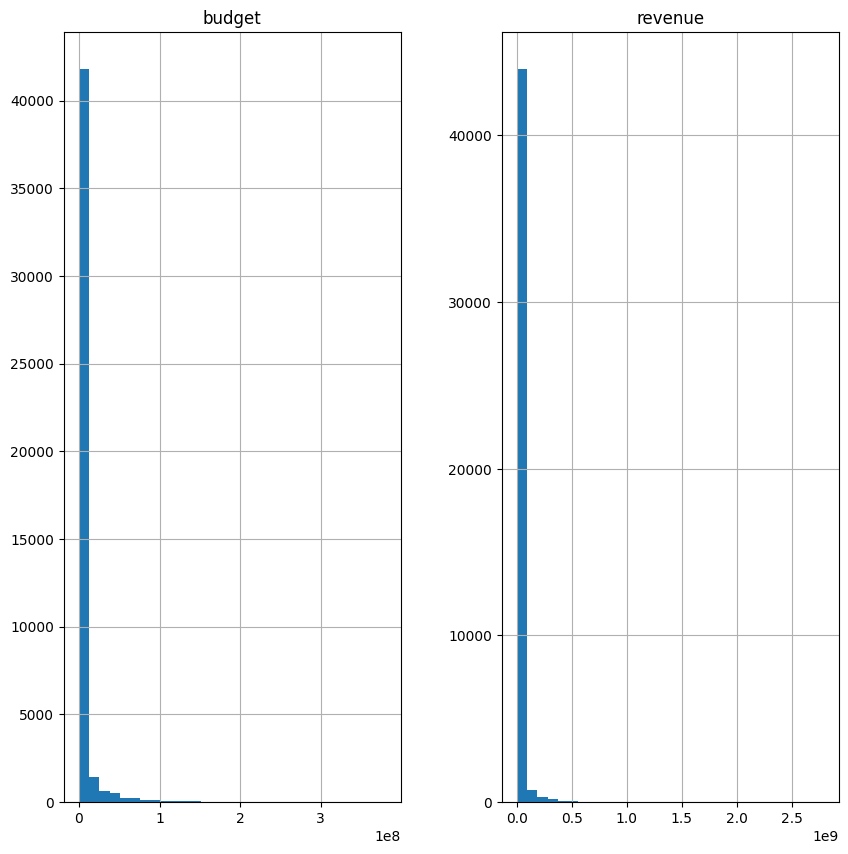

In [ ]:
movies[['budget','revenue']].hist(figsize=(10,10),bins=30)
plt.show()


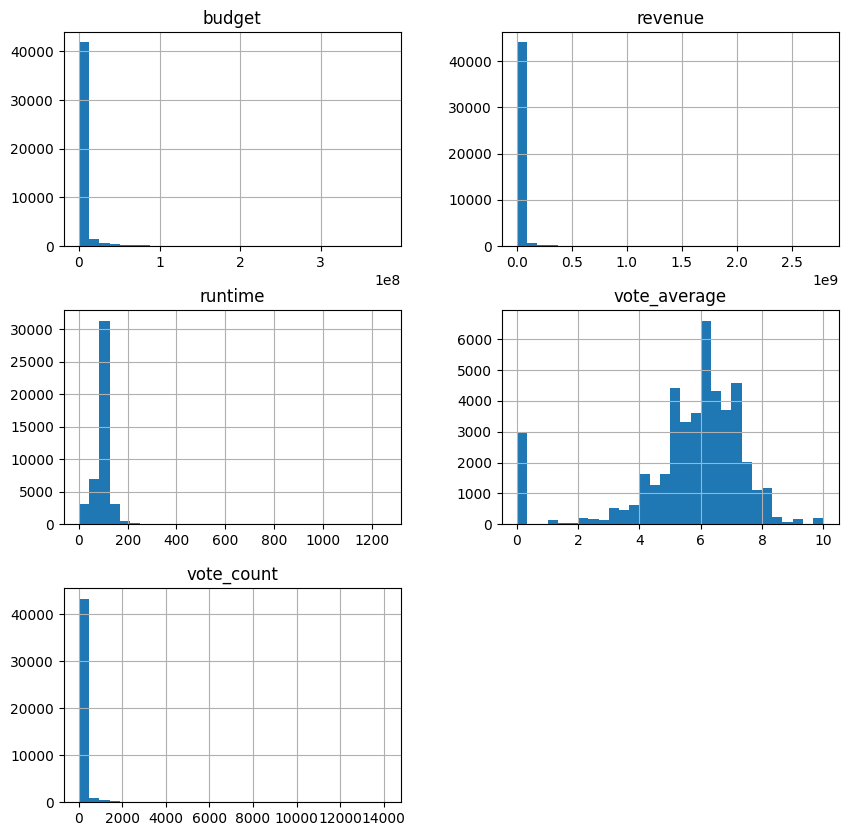

In [ ]:
movies.hist(figsize=(10,10),bins=30)
plt.show()

In [ ]:
movies = movies[movies['budget'].notnull()]


In [ ]:
movies['productivity'] = movies['revenue']/movies['budget'] *100
print(movies[movies['productivity'].isna()]['budget'].describe())
print(movies[movies['productivity'].isna()]['revenue'].describe())


count    34546.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: budget, dtype: float64
count    34543.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: revenue, dtype: float64


<ipython-input-9-6c78e5b01d20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['productivity'] = movies['revenue']/movies['budget'] *100


In [ ]:
movies['productivity'] =movies['productivity'].fillna(0)
max_value = movies['productivity'][movies['productivity']!= np.inf].max()
movies.loc[movies['productivity']==np.inf,'productivity'] = max_value
print(movies['productivity'].describe())
movies.head()

count    4.546300e+04
mean     5.533603e+07
std      2.559493e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.239638e+09
Name: productivity, dtype: float64


<ipython-input-10-a15a68e63d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['productivity'] =movies['productivity'].fillna(0)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,productivity
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1.245180e+03
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035e+02
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,0.000000e+00
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760e+02
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1.239638e+09


<ipython-input-11-298fffe117f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=movies['productivity'].astype(int), kde=True, color='r')


<Axes: xlabel='productivity', ylabel='Density'>

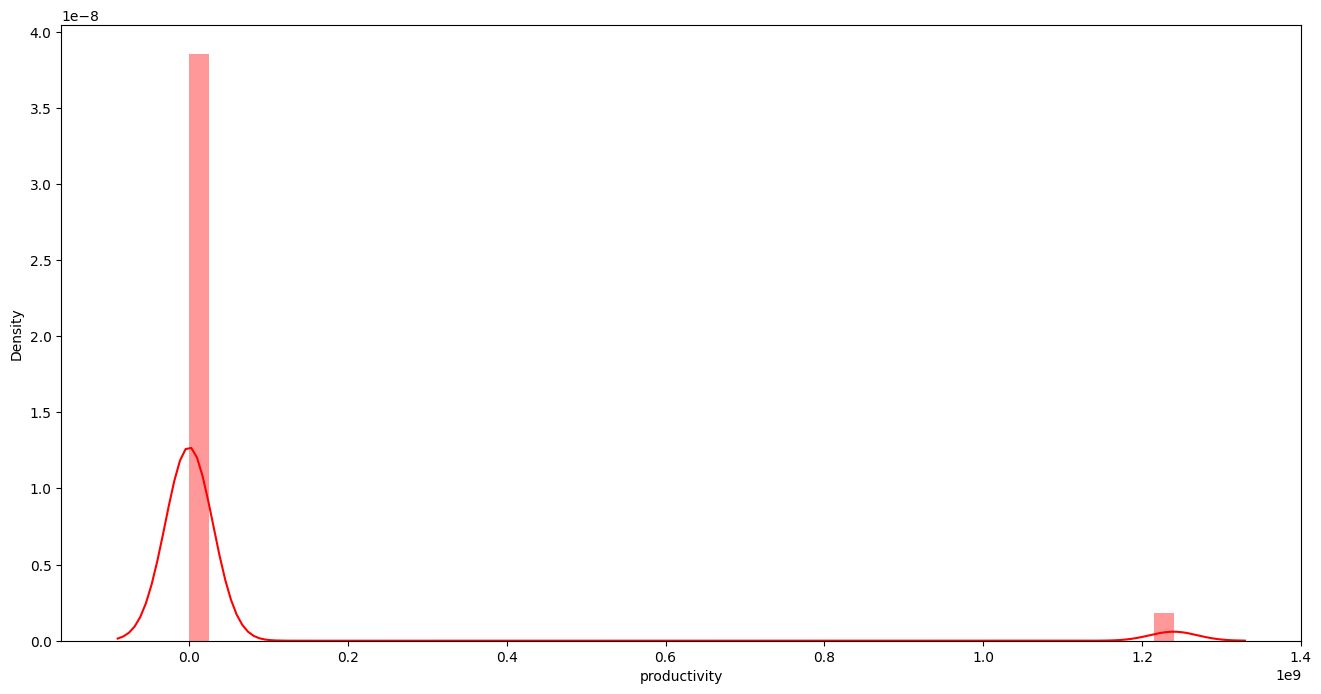

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(a=movies['productivity'].astype(int), kde=True, color='r')


In [ ]:
movies[movies['status'] != 'Released' ].shape

(449, 25)

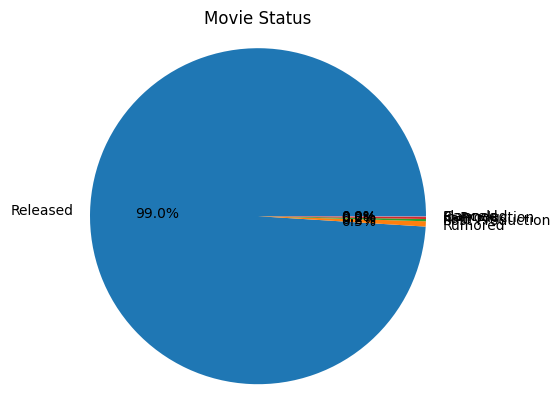

In [ ]:
status_counts = movies['status'].value_counts(dropna=False)
status_percentages = status_counts / status_counts.sum() * 100
plt.pie(status_percentages, labels=status_percentages.index, autopct='%1.1f%%')
plt.title('Movie Status')
plt.axis('equal')
plt.show()

In [ ]:
movies[movies['vote_count'] < 5 ].shape

(14562, 25)

In [ ]:
print(movies.shape)
movies.columns

(45463, 25)


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'productivity'],
      dtype='object')

In [ ]:
import json
import ast


langs = movies[movies['spoken_languages'].notnull()]['spoken_languages'].unique()
langs


array(["[{'iso_639_1': 'en', 'name': 'English'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]",
       ...,
       "[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]",
       "[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso_639_1': 'pl', 'name': 'Polski'}]",
       "[{'iso_639_1': 'ff', 'name': 'Fulfulde'}, {'iso_639_1': 'en', 'name': 'English'}]"],
      dtype=object)

In [ ]:
res_lang = set()
for lang in langs:

  l = ast.literal_eval(lang)
  for i in l:
    res_lang.add(i['iso_639_1'])
def AllLangSpoken(langSpok):
  if langSpok == None or langSpok.strip() == '' :
    return None
  l = ast.literal_eval(langSpok)
  res = ""

  for i in l:
    res += i['iso_639_1'] + '.'
  return res
movies['spoken_languages']= movies['spoken_languages'].fillna('')
movies['languages'] = movies[['spoken_languages']].applymap(lambda x: AllLangSpoken(x))
movies['languages'].fillna(movies['original_language'],inplace=True)
print(res_lang)
print(len(res_lang))
movies.isna().sum()

{'tt', 'bi', 'ml', 'et', 'sc', 'ca', 'iu', 'st', 'it', 'el', 'sh', 'hi', 'bn', 'oc', 'uk', 'sn', 'jv', 'af', 'ps', 'ur', 'bm', 'to', 'sv', 'lt', 'km', 'xx', 'si', 'mh', 'ku', 'cr', 'bs', 'ab', 'fy', 'ln', 'ro', 'no', 'da', 'te', 'mk', 'wo', 'ff', 'eo', 'ig', 'mi', 'en', 'cy', 'sq', 'zh', 'fr', 'br', 'kw', 'hr', 'nl', 'yi', 'tl', 'ky', 'gu', 'az', 'gd', 'lb', 'mt', 'sw', 'uz', 'ug', 'tk', 'my', 'fa', 'es', 'sa', 'gn', 'kk', 'hu', 'zu', 'eu', 'am', 'bg', 'sm', 'se', 'mr', 'bo', 'qu', 'sk', 'de', 'so', 'tn', 'mn', 'sr', 'th', 'ru', 'pl', 'sg', 'cs', 'he', 'is', 'pt', 'ki', 'ty', 'id', 'gl', 'be', 'ja', 'ta', 'fo', 'lo', 'dz', 'hy', 'ce', 'kn', 'la', 'tr', 'ay', 'lv', 'ha', 'pa', 'ko', 'ga', 'ms', 'ny', 'ne', 'ht', 'rw', 'tg', 'sl', 'ar', 'cn', 'vi', 'nv', 'fi', 'xh', 'co', 'ka', 'as', 'nb'}
133


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             0
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
productivity                 0
languages                    0
dtype: int64

In [ ]:
movies.drop(['homepage','original_title','tagline','original_language','spoken_languages','status','poster_path','video','budget','revenue'],axis=1,inplace=True)
movies.head()


,adult,belongs_to_collection,genres,id,imdb_id,overview,popularity,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count,productivity,languages
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Toy Story,7.7,5415.0,1.245180e+03,en.
1,False,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,Jumanji,6.9,2413.0,4.043035e+02,en.fr.
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,Grumpier Old Men,6.5,92.0,0.000000e+00,en.
3,False,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,Waiting to Exhale,6.1,34.0,5.090760e+02,en.
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,1.239638e+09,en.


In [ ]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
genres                       0
id                           0
imdb_id                     17
overview                   954
popularity                   3
production_companies         3
production_countries         3
release_date                87
runtime                    260
title                        3
vote_average                 3
vote_count                   3
productivity                 0
languages                    0
dtype: int64

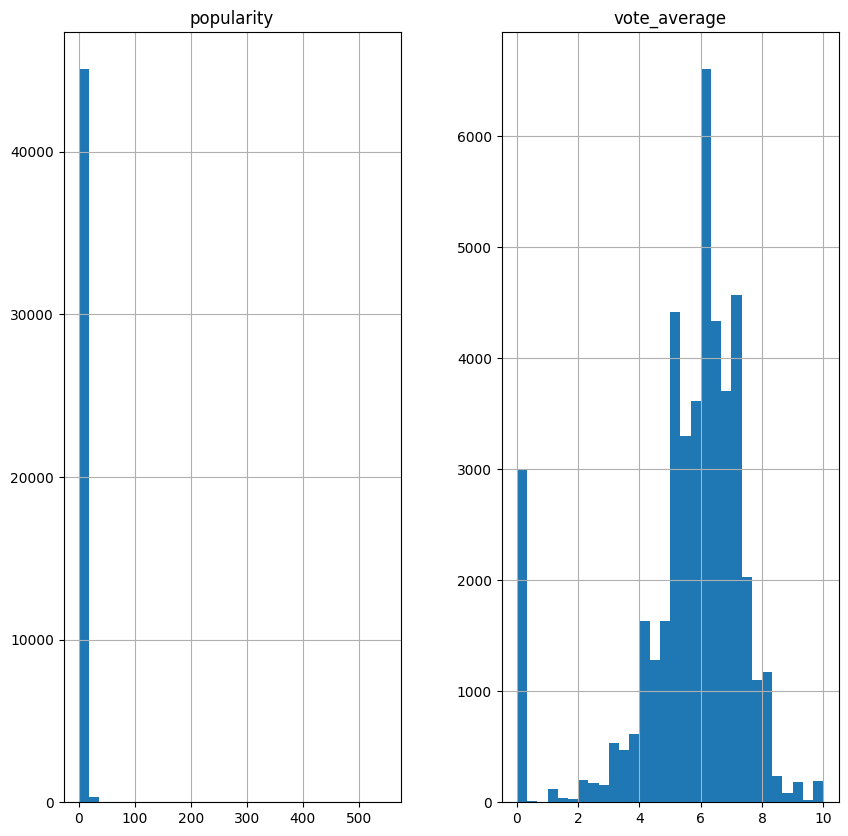

In [ ]:
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies[['popularity','vote_average']].hist(figsize=(10,10),bins=30)
plt.show()

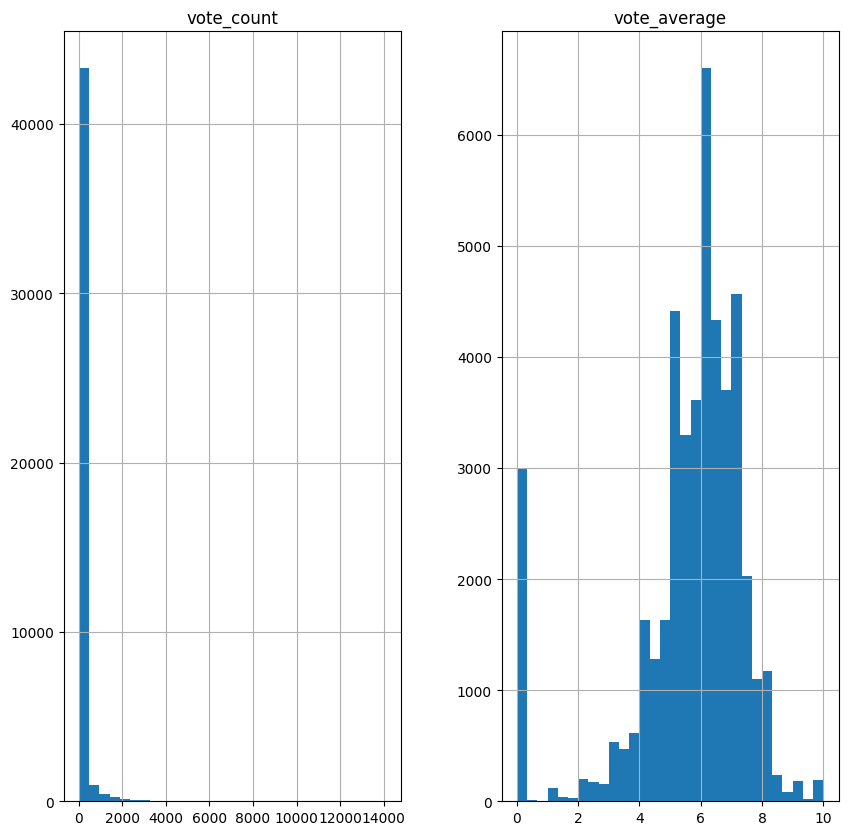

In [ ]:
movies[['vote_count','vote_average']].hist(figsize=(10,10),bins=30)
plt.show()

In [ ]:
colec_names = ['.']
colecections = movies[movies['belongs_to_collection'].notnull()]['belongs_to_collection'].unique()
for i in colecections:
  colecntion = ast.literal_eval(i)
  colecntion_name = colecntion['name']
  if colecntion_name in colec_names:
    continue
  colec_names.append(colecntion_name)
def convert_popularity(value):
  if value <5:
    return 'not popular'
  if value < 6:
    return 'almost popular'
  if value < 6.8:
    return 'very popular'
  return 'most popular'

print(colec_names)
print(len(colec_names))
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna('None')
movies[['collection_name']] = movies[['belongs_to_collection']].applymap(lambda x: '' if x=='None' else ast.literal_eval(x)['name'])
movies['is_adult'] = movies[['adult']].applymap(lambda x: 'Adults' if bool(x)==False else 'Kids')
movies['popularity_cat'] = movies[['vote_average']].applymap(lambda x: convert_popularity(x))
movies['belongs_to_collection'] = movies['belongs_to_collection'].map(lambda x: 0 if x == 'None' else 1)
movies.head()

['.', 'Toy Story Collection', 'Grumpy Old Men Collection', 'Father of the Bride Collection', 'James Bond Collection', 'Balto Collection', 'Ace Ventura Collection', 'Chili Palmer Collection', 'Babe Collection', 'Mortal Kombat Collection', 'Pocahontas Collection', 'The Lawnmower Man Collection', 'Friday Collection', 'From Dusk Till Dawn Collection', 'Screamers Collection', 'The Muppet Collection', 'The Neverending Story Collection', 'Bad Boys Collection', 'Batman Collection', 'Brooklyn Cigar Store Collection', 'Casper Collection', 'Mexico Trilogy', 'Die Hard Collection', 'Teenage Apocalypse Trilogy', 'Free Willy Collection', 'Power Rangers Collection', 'Síť (kolekce)', 'The Prophecy Collection', 'Showgirls Collection', 'Species Collection', 'Under Siege Collection', 'Burnt by the Sun Trilogy', 'Before... Collection', 'Clerks Collection', 'Dumb and Dumber Collection', 'A Goofy Movie Collection', 'The Vampire Chronicles', 'Star Wars Collection', 'Nemesis Collection', 'Once were Warriors Co

,adult,belongs_to_collection,genres,id,imdb_id,overview,popularity,production_companies,production_countries,release_date,runtime,title,vote_average,vote_count,productivity,languages,collection_name,is_adult,popularity_cat
0,False,1,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Toy Story,7.7,5415.0,1.245180e+03,en.,Toy Story Collection,Kids,most popular
1,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,Jumanji,6.9,2413.0,4.043035e+02,en.fr.,,Kids,most popular
2,False,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,Grumpier Old Men,6.5,92.0,0.000000e+00,en.,Grumpy Old Men Collection,Kids,very popular
3,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,Waiting to Exhale,6.1,34.0,5.090760e+02,en.,,Kids,very popular
4,False,1,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,1.239638e+09,en.,Father of the Bride Collection,Kids,almost popular


<Axes: >

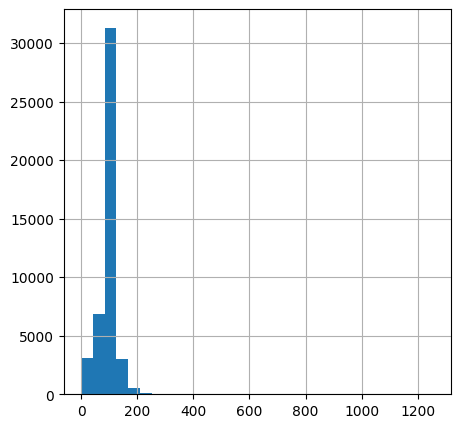

In [ ]:
movies['runtime'].hist(figsize=(5,5),bins=30)

In [ ]:
movies['runtime'] = movies['runtime'].replace(0,np.nan)
movies['runtime'].fillna(movies['runtime'].mean(),inplace=True)
movies = movies[movies['vote_count'].notnull()]
movies.isna().sum()


adult                      0
belongs_to_collection      0
genres                     0
id                         0
imdb_id                   17
overview                 954
popularity                 0
production_companies       0
production_countries       0
release_date              84
runtime                    0
title                      0
vote_average               0
vote_count                 0
productivity               0
languages                  0
collection_name            0
is_adult                   0
popularity_cat             0
dtype: int64

In [ ]:
movies['release_date'] = pd.to_datetime(movies['release_date'],errors='coerce')
movies.dropna(subset = ['release_date'],axis=0,inplace=True)
movies['release_year'] = (movies['release_date'].dt.year-1900) //10
movies['release_month'] = movies['release_date'].dt.month
movies.head()

,adult,belongs_to_collection,genres,id,imdb_id,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,productivity,languages,collection_name,is_adult,popularity_cat,release_year,release_month
0,False,1,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,Toy Story,7.7,5415.0,1.245180e+03,en.,Toy Story Collection,Kids,most popular,9,10
1,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,Jumanji,6.9,2413.0,4.043035e+02,en.fr.,,Kids,most popular,9,12
2,False,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Grumpier Old Men,6.5,92.0,0.000000e+00,en.,Grumpy Old Men Collection,Kids,very popular,9,12
3,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Waiting to Exhale,6.1,34.0,5.090760e+02,en.,,Kids,very popular,9,12
4,False,1,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,Father of the Bride Part II,5.7,173.0,1.239638e+09,en.,Father of the Bride Collection,Kids,almost popular,9,2


In [ ]:
movies['release_month2'] = movies['release_date'].dt.strftime('%B')
movies['release_year2'] = movies[['release_year']].applymap(lambda x: str(x*10)+'s')
movies.head()

,adult,belongs_to_collection,genres,id,imdb_id,overview,popularity,production_companies,production_countries,release_date,...,vote_count,productivity,languages,collection_name,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2
0,False,1,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,5415.0,1.245180e+03,en.,Toy Story Collection,Kids,most popular,9,10,October,90s
1,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,2413.0,4.043035e+02,en.fr.,,Kids,most popular,9,12,December,90s
2,False,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,92.0,0.000000e+00,en.,Grumpy Old Men Collection,Kids,very popular,9,12,December,90s
3,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,34.0,5.090760e+02,en.,,Kids,very popular,9,12,December,90s
4,False,1,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,173.0,1.239638e+09,en.,Father of the Bride Collection,Kids,almost popular,9,2,February,90s


In [ ]:
movies.isna().sum()

adult                      0
belongs_to_collection      0
genres                     0
id                         0
imdb_id                   14
overview                 941
popularity                 0
production_companies       0
production_countries       0
release_date               0
runtime                    0
title                      0
vote_average               0
vote_count                 0
productivity               0
languages                  0
collection_name            0
is_adult                   0
popularity_cat             0
release_year               0
release_month              0
release_month2             0
release_year2              0
dtype: int64

In [ ]:
movies = movies.dropna(subset='imdb_id')

movies.reset_index(inplace=True,drop=True)
movies.isna().sum()



adult                      0
belongs_to_collection      0
genres                     0
id                         0
imdb_id                    0
overview                 939
popularity                 0
production_companies       0
production_countries       0
release_date               0
runtime                    0
title                      0
vote_average               0
vote_count                 0
productivity               0
languages                  0
collection_name            0
is_adult                   0
popularity_cat             0
release_year               0
release_month              0
release_month2             0
release_year2              0
dtype: int64

In [ ]:
movies.head()

,adult,belongs_to_collection,genres,id,imdb_id,overview,popularity,production_companies,production_countries,release_date,...,vote_count,productivity,languages,collection_name,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2
0,False,1,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,5415.0,1.245180e+03,en.,Toy Story Collection,Kids,most popular,9,10,October,90s
1,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,2413.0,4.043035e+02,en.fr.,,Kids,most popular,9,12,December,90s
2,False,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,92.0,0.000000e+00,en.,Grumpy Old Men Collection,Kids,very popular,9,12,December,90s
3,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,34.0,5.090760e+02,en.,,Kids,very popular,9,12,December,90s
4,False,1,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,173.0,1.239638e+09,en.,Father of the Bride Collection,Kids,almost popular,9,2,February,90s


In [ ]:
genere_names = ['0']
generes = movies[movies['genres'].notnull()]['genres'].unique()
for i in generes:
  genere_1 = ast.literal_eval(i)
  for genere in genere_1:
    genere_name = genere['name']
    if genere_name in genere_names:
      continue
    genere_names.append(genere_name)
print(genere_names)
print(len(genere_names))
def applyGenres(genres,key='name'):

  genres_obj=ast.literal_eval(genres)
  res = ''
  for genere in genres_obj:
    res += genere[key] +'.'

  return res

movies['genres_name'] =movies[['genres']].applymap(lambda x :applyGenres(x) )
movies['countries'] =movies[['production_countries']].applymap(lambda x :applyGenres(x,'iso_3166_1') )
movies['companies'] =movies[['production_companies']].applymap(lambda x :applyGenres(x) )
movies['runtime_cat'] =movies[['runtime']].applymap(lambda x :'Short' if x < 60 else 'long' )

movies

['0', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']
21


,adult,belongs_to_collection,genres,id,imdb_id,overview,popularity,production_companies,production_countries,release_date,...,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2,genres_name,countries,companies,runtime_cat
0,False,1,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,Kids,most popular,9,10,October,90s,Animation.Comedy.Family.,US.,Pixar Animation Studios.,long
1,False,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,Kids,most popular,9,12,December,90s,Adventure.Fantasy.Family.,US.,TriStar Pictures.Teitler Film.Interscope Commu...,long
2,False,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Kids,very popular,9,12,December,90s,Romance.Comedy.,US.,Warner Bros..Lancaster Gate.,long
3,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Kids,very popular,9,12,December,90s,Comedy.Drama.Romance.,US.,Twentieth Century Fox Film Corporation.,long
4,False,1,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,Kids,almost popular,9,2,February,90s,Comedy.,US.,Sandollar Productions.Touchstone Pictures.,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45357,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,"Yet another version of the classic epic, with ...",5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,...,Kids,almost popular,9,5,May,90s,Drama.Action.Romance.,CA.DE.GB.US.,Westdeutscher Rundfunk (WDR).Working Title Fil...,long
45358,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,...,Kids,most popular,11,11,November,110s,Drama.,PH.,Sine Olivia.,long
45359,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,...,Kids,not popular,10,8,August,100s,Action.Drama.Thriller.,US.,American World Pictures.,long
45360,False,0,[],227506,tt0008536,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,...,Kids,not popular,1,10,October,10s,,RU.,Yermoliev.,long


In [ ]:
movies.drop(['production_countries','adult','production_companies','genres'],axis=1,inplace=True)
movies.head()


,belongs_to_collection,id,imdb_id,overview,popularity,release_date,runtime,title,vote_average,vote_count,...,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2,genres_name,countries,companies,runtime_cat
0,1,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,Toy Story,7.7,5415.0,...,Kids,most popular,9,10,October,90s,Animation.Comedy.Family.,US.,Pixar Animation Studios.,long
1,0,8844,tt0113497,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,Jumanji,6.9,2413.0,...,Kids,most popular,9,12,December,90s,Adventure.Fantasy.Family.,US.,TriStar Pictures.Teitler Film.Interscope Commu...,long
2,1,15602,tt0113228,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,101.0,Grumpier Old Men,6.5,92.0,...,Kids,very popular,9,12,December,90s,Romance.Comedy.,US.,Warner Bros..Lancaster Gate.,long
3,0,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,Waiting to Exhale,6.1,34.0,...,Kids,very popular,9,12,December,90s,Comedy.Drama.Romance.,US.,Twentieth Century Fox Film Corporation.,long
4,1,11862,tt0113041,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,...,Kids,almost popular,9,2,February,90s,Comedy.,US.,Sandollar Productions.Touchstone Pictures.,long


In [ ]:
movies['stringy_features'] = movies['genres_name']+'.'+movies['title']+'.'+movies['collection_name']+ '.'+movies['is_adult']+ '.'+movies['overview']+'.'+movies['popularity_cat']+ '.'+movies['companies']+'.'+movies['runtime_cat']+ '.'+movies['countries']+'.'+movies['languages']+'.'
movies.drop(['overview','languages','companies' , 'countries','genres_name'],axis=1,inplace=True)
movies.head()

,belongs_to_collection,id,imdb_id,popularity,release_date,runtime,title,vote_average,vote_count,productivity,collection_name,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2,runtime_cat,stringy_features
0,1,862,tt0114709,21.946943,1995-10-30,81.0,Toy Story,7.7,5415.0,1.245180e+03,Toy Story Collection,Kids,most popular,9,10,October,90s,long,Animation.Comedy.Family..Toy Story.Toy Story C...
1,0,8844,tt0113497,17.015539,1995-12-15,104.0,Jumanji,6.9,2413.0,4.043035e+02,,Kids,most popular,9,12,December,90s,long,Adventure.Fantasy.Family..Jumanji..Kids.When s...
2,1,15602,tt0113228,11.712900,1995-12-22,101.0,Grumpier Old Men,6.5,92.0,0.000000e+00,Grumpy Old Men Collection,Kids,very popular,9,12,December,90s,long,Romance.Comedy..Grumpier Old Men.Grumpy Old Me...
3,0,31357,tt0114885,3.859495,1995-12-22,127.0,Waiting to Exhale,6.1,34.0,5.090760e+02,,Kids,very popular,9,12,December,90s,long,Comedy.Drama.Romance..Waiting to Exhale..Kids....
4,1,11862,tt0113041,8.387519,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,1.239638e+09,Father of the Bride Collection,Kids,almost popular,9,2,February,90s,long,Comedy..Father of the Bride Part II.Father of ...


# Embedding

In [ ]:
  movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45362 entries, 0 to 45361
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45362 non-null  int64         
 1   id                     45362 non-null  object        
 2   imdb_id                45362 non-null  object        
 3   popularity             45362 non-null  float64       
 4   release_date           45362 non-null  datetime64[ns]
 5   runtime                45362 non-null  float64       
 6   title                  45362 non-null  object        
 7   vote_average           45362 non-null  float64       
 8   vote_count             45362 non-null  float64       
 9   productivity           45362 non-null  float64       
 10  collection_name        45362 non-null  object        
 11  is_adult               45362 non-null  object        
 12  popularity_cat         45362 non-null  object        
 13  r

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_features=12000, stop_words='english')

In [ ]:
cv

CountVectorizer(max_features=12000, stop_words='english')

In [ ]:
vector=cv.fit_transform(movies['stringy_features'].values.astype('U')).toarray()

In [ ]:
vector.shape



(45362, 12000)

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.decomposition import TruncatedSVD
# from datasketch import MinHashLSHForest, MinHash

# svd = TruncatedSVD(n_components=100)
# reduced_vector = svd.fit_transform(vector)

# num_perm = 128  # Number of permutations for MinHash
# lsh_forest = MinHashLSHForest(num_perm=128)


In [ ]:
# for i, vector in enumerate(reduced_vector):
#     minhash = MinHash(num_perm=128)
#     for feature in vector:
#         minhash.update(str(feature).encode('utf-8'))
#     lsh_forest.add(i, minhash)

# # Index the forest for efficient search
# lsh_forest.index()

# # Perform similarity search
# query_index = 0  # Index of the query item
# num_results = 10  # Number of similar items to retrieve
# query_minhash = MinHash(num_perm=128)
# for feature in reduced_vector[query_index]:
#     query_minhash.update(str(feature).encode('utf-8'))

# results = lsh_forest.query(query_minhash, num_results)
movies.head()

,belongs_to_collection,id,imdb_id,popularity,release_date,runtime,title,vote_average,vote_count,productivity,collection_name,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2,runtime_cat,stringy_features
0,1,862,tt0114709,21.946943,1995-10-30,81.0,Toy Story,7.7,5415.0,1.245180e+03,Toy Story Collection,Kids,most popular,9,10,October,90s,long,Animation.Comedy.Family..Toy Story.Toy Story C...
1,0,8844,tt0113497,17.015539,1995-12-15,104.0,Jumanji,6.9,2413.0,4.043035e+02,,Kids,most popular,9,12,December,90s,long,Adventure.Fantasy.Family..Jumanji..Kids.When s...
2,1,15602,tt0113228,11.712900,1995-12-22,101.0,Grumpier Old Men,6.5,92.0,0.000000e+00,Grumpy Old Men Collection,Kids,very popular,9,12,December,90s,long,Romance.Comedy..Grumpier Old Men.Grumpy Old Me...
3,0,31357,tt0114885,3.859495,1995-12-22,127.0,Waiting to Exhale,6.1,34.0,5.090760e+02,,Kids,very popular,9,12,December,90s,long,Comedy.Drama.Romance..Waiting to Exhale..Kids....
4,1,11862,tt0113041,8.387519,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,1.239638e+09,Father of the Bride Collection,Kids,almost popular,9,2,February,90s,long,Comedy..Father of the Bride Part II.Father of ...


# Models


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
numeric_data = movies.drop(['id','imdb_id','stringy_features','title','release_date','collection_name','popularity_cat','release_month2','release_year2','runtime_cat', 'is_adult'],axis=1)
numeric_data.head()


,belongs_to_collection,popularity,runtime,vote_average,vote_count,productivity,release_year,release_month
0,1,21.946943,81.0,7.7,5415.0,1.245180e+03,9,10
1,0,17.015539,104.0,6.9,2413.0,4.043035e+02,9,12
2,1,11.712900,101.0,6.5,92.0,0.000000e+00,9,12
3,0,3.859495,127.0,6.1,34.0,5.090760e+02,9,12
4,1,8.387519,106.0,5.7,173.0,1.239638e+09,9,2


In [ ]:
numeric_data['runtime'].describe()


count    45362.000000
mean        97.497955
std         33.934187
min          1.000000
25%         87.000000
50%         96.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [ ]:
movies2 = movies[['id','imdb_id','release_date','title']]

In [ ]:
class RecommenderModel(nn.Module):
    def __init__(self, numeric_input_size, embedding_size, hidden_size, fusion_hidden_size, num_items):
        super(RecommenderModel, self).__init__()
        self.numeric_input_size = numeric_input_size
        self.embedding_size = embedding_size

        self.numeric_layers = nn.Sequential(
            nn.Linear(numeric_input_size, hidden_size),
            nn.ReLU(),

        )

        self.fusion_layers = nn.Sequential(
            nn.Linear(embedding_size + hidden_size, fusion_hidden_size),
            nn.ReLU(),
        )

        # Define output layer
        self.output_layer = nn.Linear(fusion_hidden_size, num_items)

    def forward(self, numeric_features, embedded_string_features):

        numeric_output = self.numeric_layers(numeric_features)

        # Concatenate numeric and embedded string features
        fused_features = torch.cat((numeric_output, embedded_string_features), dim=1)

        # Pass fused features through fusion layers
        fused_output = self.fusion_layers(fused_features)

        # Pass fused output through output layer
        output = self.output_layer(fused_output)

        return output
class NumericModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NumericModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
        )

    def forward(self, numeric_features):
        return self.layers(numeric_features)
class StringyModel(nn.Module):
    def __init__(self, embedding_size, hidden_size):
        super(StringyModel, self).__init__()
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size

        self.layers = nn.Sequential(
            nn.Linear(embedding_size, hidden_size),
            nn.ReLU(),
        )

    def forward(self, embedded_string_features):
        return self.layers(embedded_string_features)

In [ ]:
model = RecommenderModel(numeric_data.shape[1],vector.shape[1],300,300,300)
batch_size = 32
numeric_features = torch.tensor(numeric_data.values, dtype=torch.float32)
embedded_string_features = torch.tensor(vector, dtype=torch.float32)
numeric_batches = numeric_features.split(batch_size)
embedded_string_batches = embedded_string_features.split(batch_size)
outputs = []
for numeric_batch, embedded_string_batch in zip(numeric_batches, embedded_string_batches):
    # Pass mini-batches through the model
    output_batch = model(numeric_batch, embedded_string_batch)
    outputs.append(output_batch)

output = torch.cat(outputs)


In [ ]:
torch.save(output, './Combined_model')

In [ ]:
user_indices = [0]
user_embeddings = output[user_indices]
mean_user_embeddings = torch.mean(user_embeddings, dim=0, keepdim=True)
cos_similarities = torch.nn.functional.cosine_similarity(output, mean_user_embeddings, dim=-1)
k = 0
top_similarities, top_indices = torch.topk(cos_similarities, k)
similar_movie_ids = movies.iloc[top_indices.flatten()]['title']
print(similar_movie_ids.tolist())


[]


In [ ]:
stringy_model = StringyModel(vector.shape[1], 300 )
embedded_string_features = torch.tensor(vector, dtype=torch.float32)
embedded_batches = embedded_string_features.split(32)
stringy_outputs = []
for embedded_batche in embedded_batches:
    stringy_output = stringy_model(embedded_batche)
    stringy_outputs.append(stringy_output)

stringy_output = torch.cat(stringy_outputs)


In [ ]:
import pickle
with open('movie_dataset.pkl', 'wb') as f:
    pickle.dump(movies2, f)
torch.save(stringy_output, './string_only')


In [ ]:
user_indices = [0]
user_embeddings = stringy_output[user_indices]
mean_user_embeddings = torch.mean(user_embeddings, dim=0, keepdim=True)

cos_similarities = torch.nn.functional.cosine_similarity(stringy_output,mean_user_embeddings, dim=-1)
k = 10
top_similarities, top_indices = torch.topk(cos_similarities, k)
print(top_indices[0])
similar_movie_ids = movies.iloc[top_indices.flatten()]['title']
similar_movie_ids

tensor(0)


0                   Toy Story
2995              Toy Story 2
15338             Toy Story 3
9918                  Ringu 0
23188                   Rio 2
14483                Morphine
37327          The Golden Key
34741                Lemonade
36307                    Raaz
13728    OSS 117: Lost in Rio
Name: title, dtype: object

In [ ]:
user_indices = [14975]
user_embeddings = stringy_output[user_indices]
mean_user_embeddings = torch.mean(user_embeddings, dim=0, keepdim=True)

cos_similarities = torch.nn.functional.cosine_similarity(stringy_output,mean_user_embeddings, dim=-1)
k = 10
top_similarities, top_indices = torch.topk(cos_similarities, k)
print(top_indices[0])
similar_movie_ids = movies.iloc[top_indices.flatten()]
similar_movie_ids

tensor(14975)


,belongs_to_collection,id,imdb_id,popularity,release_date,runtime,title,vote_average,vote_count,productivity,collection_name,is_adult,popularity_cat,release_year,release_month,release_month2,release_year2,runtime_cat,stringy_features
14975,1,22582,tt0105616,10.978036,1992-10-01,84.0,Tom and Jerry: The Movie,5.6,96.0,0.000000e+00,Tom and Jerry Collection,Kids,almost popular,9,10,October,90s,long,Animation.Family..Tom and Jerry: The Movie.Tom...
26273,0,63039,tt0168355,5.055015,1999-05-02,160.0,Noah's Ark,3.9,12.0,0.000000e+00,,Kids,not popular,9,5,May,90s,long,TV Movie.Drama..Noah's Ark..Kids.In the Biblic...
13157,0,17912,tt0107065,1.445489,1993-12-12,153.0,Gypsy,4.8,6.0,0.000000e+00,,Kids,not popular,9,12,December,90s,long,TV Movie.Comedy.Drama.Music..Gypsy..Kids.Based...
31216,1,199753,tt3108584,4.342685,2013-08-04,66.0,Tom and Jerry's Giant Adventure,4.8,22.0,0.000000e+00,Tom and Jerry Collection,Kids,not popular,11,8,August,110s,long,Animation.Family..Tom and Jerry's Giant Advent...
15920,0,41201,tt0775489,6.971611,2010-02-16,80.0,The Illusionist,7.2,177.0,3.112462e+01,,Kids,most popular,11,2,February,110s,long,Animation.Drama..The Illusionist..Kids.Scotlan...
18710,0,293097,tt0091175,0.014956,1986-03-28,71.0,Harmagedon - Erään maailman loppu,0.0,0.0,0.000000e+00,,Kids,not popular,8,3,March,80s,long,.Harmagedon - Erään maailman loppu..Kids.Film ...
21787,0,293109,tt0138680,0.036478,1965-10-01,93.0,Onnenpeli,6.0,1.0,0.000000e+00,,Kids,very popular,6,10,October,60s,long,.Onnenpeli..Kids.Film by Risto Jarva..very pop...
23449,0,192133,tt2402085,4.250364,2013-09-07,118.0,Jimi: All Is by My Side,5.3,63.0,1.239638e+09,,Kids,almost popular,11,9,September,110s,long,Drama.Music..Jimi: All Is by My Side..Kids.A d...
27464,1,27850,tt0173886,5.318151,1998-11-10,81.0,Halloweentown,6.3,97.0,0.000000e+00,Halloweentown Collection,Kids,very popular,9,11,November,90s,long,Adventure.Comedy.Family.Fantasy.Horror.TV Movi...
5301,0,27225,tt0083015,2.648622,1981-07-01,121.0,S.O.B.,6.3,25.0,0.000000e+00,,Kids,very popular,8,7,July,80s,long,Comedy..S.O.B...Kids.A movie producer who made...


In [ ]:
def make_recomendation(user_indicecs,model_out_put,movies,k,):
  user_choise = model_out_put[user_indicecs]
  mean_user_choise = torch.mean(user_choise, dim=0, keepdim=True)
  cos_similarities = torch.nn.functional.cosine_similarity(model_out_put,mean_user_choise, dim=-1)
  top_similarities, top_indices = torch.topk(cos_similarities, k)
  similar_movie_ids = movies.iloc[top_indices.flatten()]['id']
  return similar_movie_ids.tolist()



In [ ]:

numeric_model = NumericModel(numeric_features.shape[1],500)
numeric_features = torch.tensor(numeric_data.values, dtype=torch.float32)
numeric_outputs = []
numeric_batches = numeric_features.split(16)
for batch in numeric_batches:
  numeric_output = numeric_model(batch)
  numeric_outputs.append(numeric_output)
numeric_output = torch.cat(numeric_outputs)

In [ ]:
user_indices = [5]
user_embeddings = numeric_output[user_indices]
cos_similarities2 = torch.nn.functional.cosine_similarity(numeric_output,user_embeddings, dim=-1)
top_similarities2, top_indices2 = torch.topk(cos_similarities2, 10)
similar_movie_ids2 = movies.iloc[top_indices2.flatten()]['title']
similar_movie_ids2


5                               Heat
16935                          Hanna
13939                         Orphan
24102    A Walk Among the Tombstones
17743                      Moneyball
11401                        Déjà Vu
6986                The Last Samurai
25353                       Unbroken
1610             Alien: Resurrection
17735                      Contagion
Name: title, dtype: object